In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [136]:
def date_time(data):
    months = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}
    data["Year"] = [word[8:] for word in data["State"]]
    data["Year"] = data["Year"].astype(int)
    data["Day"] = [word[:2] for word in data["Date"]]
    data["Day"] = data["Day"].astype(int)
    data["Month"] = [months[word[3:6]] for word in data["Date"]]
    data["Hour"] = [time[7:-2] for time in data["Date"]]
    data["Hour"] = data["Hour"].astype(int)
    data["datetime"] = pd.to_datetime(data[["Year", "Month", "Day"]])
    data.drop(labels=["Day", "Month"], axis=1, inplace=True)

def check_holiday(data, holidays):
    holidays["date"] = pd.to_datetime(holidays["date"])
    data["Holidays"] = data["datetime"].isin(holidays["date"])

def convert_date(data):
    data["currentYear"] = data.datetime.dt.year
    data["currentMonth"] = data.datetime.dt.month
    data["currentDay"] = data.datetime.dt.day
    data["currnetDayOfWeek"] = data.datetime.dt.dayofweek
    data["currnetDayOfYear"] = data.datetime.dt.dayofyear

    data.drop(labels=["Date", "Year", "datetime", "State"], axis=1, inplace=True)

def change_data(data, holidays):
    check_holiday(data, holidays)
    convert_date(data)
    

In [137]:
data = pd.read_excel("Data/Electricity/Data 2017-2023 (1).xlsx")
holidays = pd.read_csv("Data/Public Holidays/2018.csv")
weather = pd.read_csv("Data/Weather/weather.csv")
weather = weather[["datetime", "tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "solarenergy"]]
data.head(), len(data)

(          State         Date  Hourly Demand Met (in MW)
 0  Delhi - 2023  01-Jan 12am                    2252.78
 1  Delhi - 2023   01-Jan 1am                    2013.40
 2  Delhi - 2023   01-Jan 2am                    1872.10
 3  Delhi - 2023   01-Jan 3am                    1806.61
 4  Delhi - 2023   01-Jan 4am                    1855.44,
 61344)

In [138]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          366 non-null    object
 1   day           366 non-null    object
 2   holiday       366 non-null    object
 3   holiday_type  366 non-null    object
dtypes: object(4)
memory usage: 11.6+ KB


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61344 entries, 0 to 61343
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      61344 non-null  object 
 1   Date                       61344 non-null  object 
 2   Hourly Demand Met (in MW)  61344 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [140]:
weather["datetime"] = weather["datetime"].astype("datetime64[ns]")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      2921 non-null   datetime64[ns]
 1   tempmax       2921 non-null   float64       
 2   tempmin       2921 non-null   float64       
 3   temp          2921 non-null   float64       
 4   feelslikemax  2921 non-null   float64       
 5   feelslikemin  2921 non-null   float64       
 6   feelslike     2921 non-null   float64       
 7   solarenergy   2921 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 182.7 KB


In [141]:
data_copy = data.copy()
data_copy.head()

,State,Date,Hourly Demand Met (in MW)
0,Delhi - 2023,01-Jan 12am,2252.78
1,Delhi - 2023,01-Jan 1am,2013.40
2,Delhi - 2023,01-Jan 2am,1872.10
3,Delhi - 2023,01-Jan 3am,1806.61
4,Delhi - 2023,01-Jan 4am,1855.44


In [142]:
date_time(data_copy)
data_copy.head()

,State,Date,Hourly Demand Met (in MW),Year,Hour,datetime
0,Delhi - 2023,01-Jan 12am,2252.78,2023,12,2023-01-01
1,Delhi - 2023,01-Jan 1am,2013.40,2023,1,2023-01-01
2,Delhi - 2023,01-Jan 2am,1872.10,2023,2,2023-01-01
3,Delhi - 2023,01-Jan 3am,1806.61,2023,3,2023-01-01
4,Delhi - 2023,01-Jan 4am,1855.44,2023,4,2023-01-01


In [143]:
data_copy_copy = data_copy.copy()
holidays_copy = holidays.copy()

In [144]:
holidays_copy = holidays_copy[~holidays_copy['holiday_type'].isin(['observance', 'Restricted', 'Restricted Holiday'])]
holidays_copy.head()

,date,day,holiday,holiday_type
4,2017-01-26,Thursday,Republic Day,Gazetted Holiday
9,2017-02-24,Friday,Maha Shivaratri/Shivaratri,Gazetted Holiday
11,2017-03-13,Monday,Holi,Gazetted Holiday
13,2017-04-04,Tuesday,Rama Navami,Gazetted Holiday
14,2017-04-09,Sunday,Mahavir Jayanti,Gazetted Holiday


In [145]:
result = pd.merge(data_copy, weather, on="datetime", how="left")
result

result_copy_copy = result.copy()

In [146]:
change_data(result, holidays_copy)

In [147]:
holidays_copy.head()

,date,day,holiday,holiday_type
4,2017-01-26,Thursday,Republic Day,Gazetted Holiday
9,2017-02-24,Friday,Maha Shivaratri/Shivaratri,Gazetted Holiday
11,2017-03-13,Monday,Holi,Gazetted Holiday
13,2017-04-04,Tuesday,Rama Navami,Gazetted Holiday
14,2017-04-09,Sunday,Mahavir Jayanti,Gazetted Holiday


In [148]:
result.value_counts()

Hourly Demand Met (in MW)  Hour  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  solarenergy  Holidays  currentYear  currentMonth  currentDay  currnetDayOfWeek  currnetDayOfYear
527.28                     3     23.7     10.2     16.2  23.7          10.2          16.2       14.3         False     2018         12            7           4                 341                 2
2895.03                    7     28.1     18.5     23.1  27.9          18.5          23.0       19.8         False     2018         2             25          6                 56                  2
2892.05                    8     27.0     17.0     21.3  27.3          17.0          21.3       15.0         False     2018         11            15          3                 319                 2
4696.59                    8     35.4     24.9     29.9  40.6          24.9          33.1       22.1         False     2018         9             19          2                 262                 2
2892.66        

In [149]:
duplicate_rows = result.duplicated()

In [150]:
duplicate_rows == True

0        False
1        False
2        False
3        False
4        False
         ...  
70099    False
70100    False
70101    False
70102    False
70103    False
Length: 70104, dtype: bool

In [151]:
result_copy = result.copy()

In [152]:
result_copy.drop_duplicates(inplace=True)

In [153]:
result_copy

,Hourly Demand Met (in MW),Hour,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarenergy,Holidays,currentYear,currentMonth,currentDay,currnetDayOfWeek,currnetDayOfYear
0,2252.78,12,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
1,2013.40,1,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
2,1872.10,2,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
3,1806.61,3,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
4,1855.44,4,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70099,2986.64,7,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365
70100,2780.17,8,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365
70101,2539.07,9,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365
70102,2316.31,10,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365


In [154]:
result_copy.reset_index(inplace=True)

In [155]:
result_copy.drop("index", axis=1, inplace=True)
result_copy

,Hourly Demand Met (in MW),Hour,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarenergy,Holidays,currentYear,currentMonth,currentDay,currnetDayOfWeek,currnetDayOfYear
0,2252.78,12,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
1,2013.40,1,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
2,1872.10,2,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
3,1806.61,3,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
4,1855.44,4,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61336,2986.64,7,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365
61337,2780.17,8,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365
61338,2539.07,9,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365
61339,2316.31,10,22.3,8.0,13.3,22.3,7.9,13.2,14.1,False,2017,12,31,6,365


# Data Visualization

In [156]:
result_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61341 entries, 0 to 61340
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hourly Demand Met (in MW)  61341 non-null  float64
 1   Hour                       61341 non-null  int64  
 2   tempmax                    61341 non-null  float64
 3   tempmin                    61341 non-null  float64
 4   temp                       61341 non-null  float64
 5   feelslikemax               61341 non-null  float64
 6   feelslikemin               61341 non-null  float64
 7   feelslike                  61341 non-null  float64
 8   solarenergy                61341 non-null  float64
 9   Holidays                   61341 non-null  bool   
 10  currentYear                61341 non-null  int32  
 11  currentMonth               61341 non-null  int32  
 12  currentDay                 61341 non-null  int32  
 13  currnetDayOfWeek           61341 non-null  int

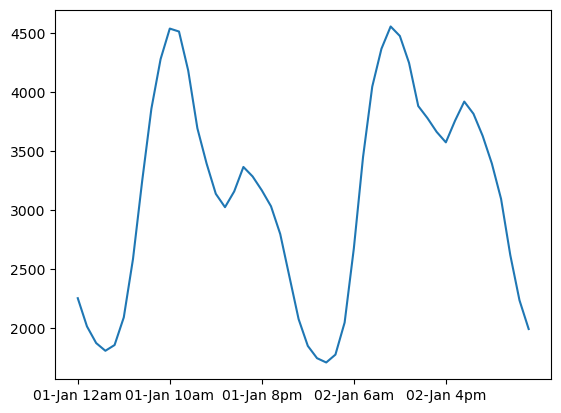

In [157]:
fig, ax = plt.subplots()
ax.plot(data["Date"][:50], data["Hourly Demand Met (in MW)"][:50])
ax.set_xticks(np.arange(0,50,10));

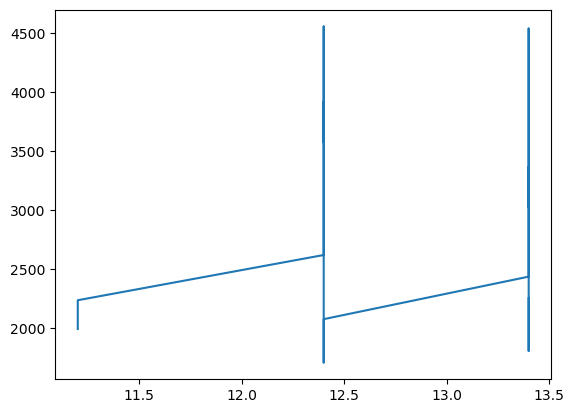

In [158]:
fig, ax = plt.subplots()
ax.plot(result["temp"][:50], result["Hourly Demand Met (in MW)"][:50]);

In [159]:
result.head()

,Hourly Demand Met (in MW),Hour,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarenergy,Holidays,currentYear,currentMonth,currentDay,currnetDayOfWeek,currnetDayOfYear
0,2252.78,12,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
1,2013.40,1,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
2,1872.10,2,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
3,1806.61,3,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1
4,1855.44,4,20.1,7.9,13.4,20.1,7.9,13.3,12.5,False,2023,1,1,6,1


In [160]:
data.head(20)

,State,Date,Hourly Demand Met (in MW)
0,Delhi - 2023,01-Jan 12am,2252.78
1,Delhi - 2023,01-Jan 1am,2013.40
2,Delhi - 2023,01-Jan 2am,1872.10
3,Delhi - 2023,01-Jan 3am,1806.61
4,Delhi - 2023,01-Jan 4am,1855.44
5,Delhi - 2023,01-Jan 5am,2089.85
6,Delhi - 2023,01-Jan 6am,2584.39
7,Delhi - 2023,01-Jan 7am,3247.95
8,Delhi - 2023,01-Jan 8am,3860.26
9,Delhi - 2023,01-Jan 9am,4280.86


In [161]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Modelling

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.svm import LinearSVR

X = result_copy.drop("Hourly Demand Met (in MW)", axis=1)
y = result_copy["Hourly Demand Met (in MW)"]

X[X.columns] = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(
    n_jobs = -1,
    random_state=42
)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5782548326943779

In [163]:
result_copy.to_csv("trainingset.csv")

In [164]:
from sklearn.metrics import mean_absolute_error, r2_score

def cal_error(model):
    y_preds = model.predict(X_test)
    return mean_absolute_error(y_preds, y_test)

In [165]:
models_name = [RandomForestRegressor(), LinearRegression(), SGDRegressor(), Lasso(), ElasticNet(), Ridge(), LinearSVR()]

def train_models(models_name):
    models = []
    for i in models_name:
        i.fit(X_train, y_train)
        models.append(i)
    return models

def score_model(models):
    lst = []
    for i in models:
        lst.append(cal_error(i))
    return lst

In [166]:
models = train_models(models_name)

In [167]:
models

[RandomForestRegressor(),
 LinearRegression(),
 SGDRegressor(),
 Lasso(),
 ElasticNet(),
 Ridge(),
 LinearSVR()]

In [168]:
errors = score_model(models)
errors

[657.8321748084934,
 619.7754631098101,
 620.0495704575487,
 619.344001417691,
 800.135922281087,
 619.3283785967786,
 645.2540088214611]

In [169]:
value = min(errors)
value

619.3283785967786

In [170]:
n = errors.index(value)

In [171]:
models_name[n]

Ridge()

In [172]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [173]:
y_preds = xgb.predict(X_test)

In [174]:
mean_absolute_error(y_preds, y_test)

476.25873307989457

In [175]:
r2_score(y_preds, y_test)

0.7354318309177732

In [176]:
from xgboost import XGBRFRegressor

xgb_rf = XGBRFRegressor()

xgb_rf.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [177]:
xgb_rf.score(X_test, y_test)

0.7589420652029869

In [178]:
y_preds = xgb_rf.predict(X_test)
mean_absolute_error(y_preds, y_test)

494.3945331404034

In [129]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
}

gs_model = GridSearchCV(
    param_grid=param_grid,
    estimator=xgb,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=True,
    n_jobs=-1
)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=True)

In [130]:
gs_model.best_params_

print(f"Best score: {gs_model.best_score_}")

Best score: -462.15509735011375


In [131]:
gs_model.score(X_test, y_test)

-456.85630525868044

In [132]:
y_preds = gs_model.predict(X_test)

mean_absolute_error(y_preds, y_test)

456.85630525868044

In [133]:
r2_score(y_preds, y_test)

0.7501255605254721

In [134]:
result_copy["Hourly Demand Met (in MW)"].max(), result_copy["Hourly Demand Met (in MW)"].min()

(7712.59, 527.28)

In [135]:
xgb = XGBRegressor()

param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10, 1),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'subsample': np.linspace(0.5, 1.0, 10),
    'colsample_bytree': np.linspace(0.5, 1.0, 10),
    'gamma': np.linspace(0, 0.5, 10),
}

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.052222222222222225, 'gamma': 0.05555555555555555, 'colsample_bytree': 0.6666666666666666}
Best score: -461.40124370614393


In [138]:
y_preds = random_search.predict(X_test)

mean_absolute_error(y_preds, y_test)

# r2_score(y_preds, y_test)

456.8256238426751

In [137]:
best_model = gs_model

In [56]:
import pickle

def save_model(model, name):
    pickle.dump(best_model, open(name, "wb"))

def load_model(name):
    loaded_model = pickle.load(open(name, "rb"))
    return loaded_model

In [54]:
save_model(best_model, "best-model-xgbr-1.pkl")

In [57]:
loadeded_model = load_model("best-model-xgbr-1.pkl")

In [58]:
loadeded_model.score(X_test, y_test)

-463.79434641272275

In [60]:
from sklearn.model_selection import cross_val_score

cross_val_score(loadeded_model, X_test, y_test, scoring="neg_mean_absolute_error")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


array([-470.81553455, -473.48919056, -467.61173683, -470.22096943,
       -468.48158929])

In [6]:
weather.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarenergy
0,2017-01-01,22.2,9.4,15.6,22.2,9.4,15.6,12.7
1,2017-01-02,23.6,11.0,16.2,23.6,11.0,16.2,13.1
2,2017-01-03,23.5,10.8,15.6,23.5,10.8,15.6,13.5
3,2017-01-04,24.8,10.2,16.8,24.8,10.2,16.8,14.1
4,2017-01-05,24.9,11.3,17.1,24.9,11.3,17.1,14.2
